# MLP Modeling for Interest Rates + S&P 500 Data

### Imports and Setup

In [1]:
# imports
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

from logics_sp500 import rate_modeler, rate_forecast


# set colors
color0a = "#09EE90"
color0b = "#008000"
color1a = "#87CEFA"
color1b = "#0000CD"
color2a = "#F08080"
color2b = "#B22222"

# read data
df = pd.read_csv("../00_data/clean_rate_sp500.csv", parse_dates=["Date"])

base_viz = True

### Base Data Visualizations

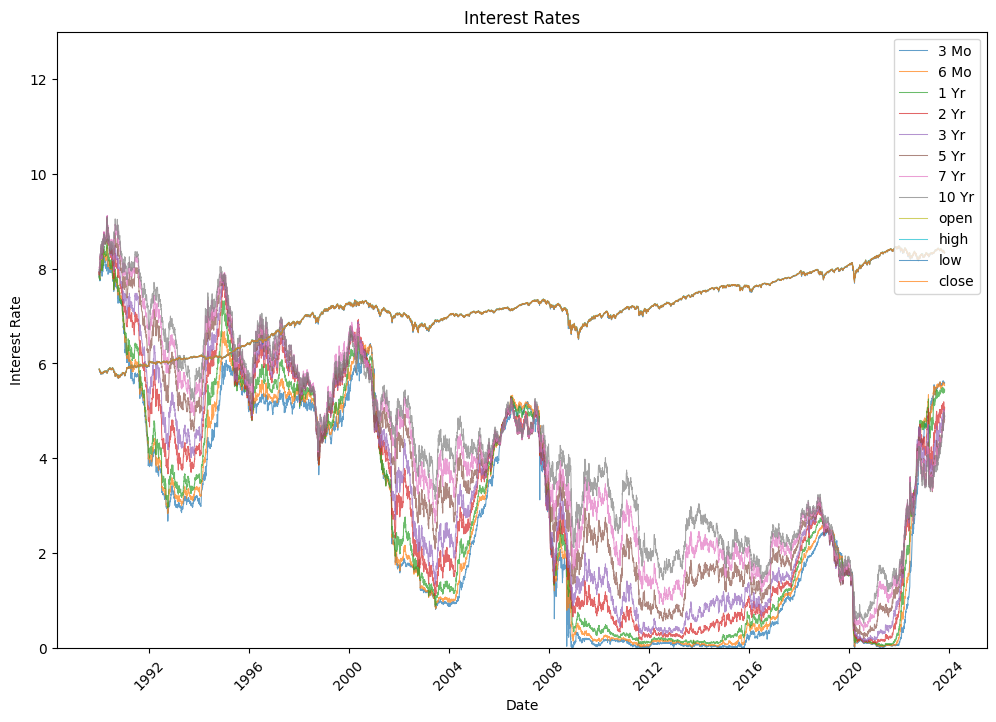

In [2]:
if base_viz:
    # Plot the remaining data
    plt.figure(figsize=(12, 8))

    # loop through the non-date columns
    for i in range(1, len(df.columns)):
        plt.plot(
            df["Date"], df.iloc[:, i], label=df.columns[i], alpha=0.7, linewidth=0.75
        )

    # Set the X axis label to be more readable
    plt.xticks(rotation=45)

    # make the X axis year only
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))

    # set ylim
    plt.ylim(0, 13)

    # set the title and axis labels
    plt.title("Interest Rates")
    plt.xlabel("Date")
    plt.ylabel("Interest Rate")

    # set the legend
    plt.legend(loc="upper right")

    # show
    plt.show()

### Data Preprocessing

To conduct each experiment, a dataset will be constructed locally based on the following parameters:

- **Lookback Range**: The number of days of data to use to predict the next target date's interest rate. This will be a hyperparameter that will be tuned for each experiment.
- **Target Date**: The date for which the interest rate will be predicted, expressed as T+N. This will be a hyperparameter that will be tuned for each experiment.

To illustrate the process, we will use the following example:

- **Lookback Range**: 25 days
- **Target Date**: T+5

To predict the interest rate curve for T+5 using a 25-day lookback range, we will build the dataset as follows:

- Configure the dataset so that the oldest 30 days are not used as targets in training or validation. This is because of the 25-day lookback range and the 5-day target date.
- For each target date, we will add the 5 to 30 days of preceeding data to the dataset as predictors. This will be the parameter set for the model.
- The target for each target date will be the interest rate curve for that date, but functionally this training date is one week in the future from our last data point.

We will then use this dataset to train MLP Regression models to predict the interest rate curve for T+5 and assess the accuracy.

### Configure Parameters for Model Searching

Lookback minimum is 1

Lookforward minimum is 2

When you have configured you model and ranges to the desired values, run the cell with `save_data = True` and `save_model = True` to get the appropriate data and model files saved to the correct locations.

The function will return the `score` and `mse` to help with grid searching.

In [3]:
# a dictionary of models to search through
model_param_dict = {
    1: {"lb": 100, "lf": 2, "hl": (200, 200, 200, 200, 200, 200, 200, 200, 200, 200)},
    2: {"lb": 100, "lf": 30, "hl": (200, 200, 200, 200, 200, 200, 200, 200, 200, 200)},
    3: {"lb": 756, "lf": 252, "hl": (200, 200, 200, 200, 200, 200, 200, 200, 200, 200)},
    4: {
        "lb": 1008,
        "lf": 2520,
        "hl": (200, 200, 200, 200, 200, 200, 200, 200, 200, 200),
    },
    5: {"lb": 504, "lf": 30, "hl": (200, 200, 200, 200, 200, 200, 200, 200, 200, 200)},
    6: {
        "lb": 2520,
        "lf": 2520,
        "hl": (200, 200, 200, 200, 200, 200, 200, 200, 200, 200),
    },
}

In [ ]:
score_df = pd.DataFrame(columns=["score", "mse", "model"])

# from model param dict, use the models to run rate_modeler
for i in model_param_dict:
    # run the modeler
    score, mse = rate_modeler(
        df,
        model_param_dict[i]["lb"],
        model_param_dict[i]["lf"],
        model_param_dict[i]["hl"],
        verbosity=False,
        save_data=False,
        save_model=True,
        visual=False,
        tol=1e-4,
    )

    # add the score and mse to the score_df
    score_df = pd.concat(
        [
            score_df,
            pd.DataFrame(
                {"score": [score], "mse": [mse], "model": [model_param_dict[i]]}
            ),
        ]
    )

    # Build the forecast
    rate_forecast(
        lb=model_param_dict[i]["lb"], lf=model_param_dict[i]["lf"], df=df, save=True
    )

-----Building Data-----


-----Modeling Data-----


-----Model Training Complete-----
Model Score: 0.9736770654492952
Model MSE: 0.02401152012894756


/tmp/ipykernel_87/34143641.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_df = pd.concat(


-----Building Data-----


-----Modeling Data-----


-----Model Training Complete-----
Model Score: 0.9878153557658281
Model MSE: 0.03985374104462472
-----Building Data-----


-----Modeling Data-----


-----Model Training Complete-----
Model Score: 0.9669295517998381
Model MSE: 0.02952168524964352
-----Building Data-----


-----Modeling Data-----


-----Model Training Complete-----
Model Score: 0.981476129420435
Model MSE: 0.017261341193003685
-----Building Data-----


-----Modeling Data-----


-----Model Training Complete-----
Model Score: 0.9901845772144447
Model MSE: 0.01914055353882299
-----Building Data-----


-----Modeling Data-----


-----Model Training Complete-----
Model Score: 0.9707660293689404
Model MSE: 0.022094975289759105


### Print the score df

In [ ]:
score_df

,score,mse,model
0,0.973677,0.024012,"{'lb': 100, 'lf': 2, 'hl': (200, 200, 200, 200..."
0,0.987815,0.039854,"{'lb': 100, 'lf': 30, 'hl': (200, 200, 200, 20..."
0,0.966930,0.029522,"{'lb': 756, 'lf': 252, 'hl': (200, 200, 200, 2..."
0,0.981476,0.017261,"{'lb': 1008, 'lf': 2520, 'hl': (200, 200, 200,..."
0,0.990185,0.019141,"{'lb': 504, 'lf': 30, 'hl': (200, 200, 200, 20..."
0,0.970766,0.022095,"{'lb': 2520, 'lf': 2520, 'hl': (200, 200, 200,..."
